In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
# 주석 설정 -> ctrl 혹은 cmd + /
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

# 데이터 로드
* .read_csv("파일경로") <- 파일의 데이터를 읽어온다
* .shape <- 데이터의 갯수를 찍어준다 (무조건 "행,열" 순으로 출력)

# 데이터 확인
* .head() <- 다섯개의 행 데이터를 디폴트로 볼 수 있다.
* .tail() <- 마지막 부분에 있는 데이터 미리보기 가능
* .info() <- 데이터 요약으로 볼 수 있음
* .columns <- 컬럼명만 출력
* .dtypes <- 데이터타입 확인

# 결측치
* .isnull() <- 데이터 값이 null값인지 아닌지 확인 null인 경우 True로 표시
    * isnull().sum() <- 결측치가 몇개가 있는지 카운트해서 보여준다
* 계산한 결측치 수를 resset_index 통해서 데이터프레임으로 만들 수 있다
* NaN == Not a Number의 약자 <- 결측치 의미

In [65]:
df = pd.read_csv("data/상가(상권)정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

In [66]:
df.head()
df.tail()
df.info
df.columns
df.dtypes
df.isnull().sum()
null_count = df.isnull().sum()

# 그래프 확인
* .plot()를 통해 그래프로 확인 가능
    * plot을 적은 뒤 .을 누르고 Tab키를 누르면 여러 그래프를 그릴 수 있는 속성이 나온다.
    * kde, density -> 밀도
    * line -> 기본값, 선그래프
    * pie -> 파이 차트
    * bar()
        * 글자가 세워져서 나오는데 rot=숫자 이렇게 옵션을 줘서 글자를 돌릴 수 있다.
        * barh() -> x,y축을 바꾸어서 보여준다
        * figsize=(x,y) <- 그래프 크기 조정

<AxesSubplot:>

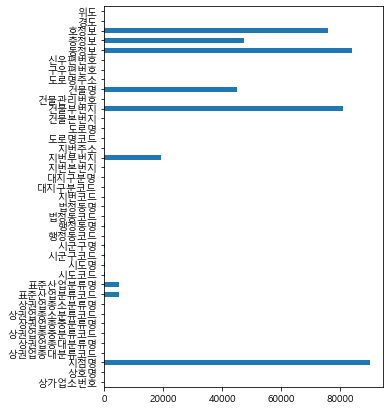

In [67]:
null_count.plot.barh(figsize=(5,7))

* 계산한 결측치 수를 reset_index 통해서 데이터프레임으로 만들 수 있다

In [68]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


# 컬럼명
* 컬럼명을 변경 할 때 => 변수.columns = ["바꾸고 싶은 컬럼명", "바꾸고 싶은 컬럼명2"]

In [69]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


# 정렬

* .sort_values() -> valudes값으로 정렬
    * by="정렬하고싶은 컬럼" -> 적은 순서대로 정렬
    * ascending=False -> 큰 순서대로 정렬 (True가 디폴트)
* .sort_index() -> index값으로 정렬

In [70]:
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top
# 만약에 데이터가 너무 커서 결측치 분석 속도가 너무 오래 걸릴경우 사용하지 않는 것도 하나의 방법

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


# 특정 컬럼

* 특정 컬럼을 불러오는 방법 -> 변수["불러오고 싶은 컬럼명"]
* 변수["특정 컬럼명"].tolist()를 주면 리스트 형태롤 변경해준다.

In [71]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns 

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [72]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져온다. 

# 조금 더 깊은 이해 필요.....ㅠㅠ

df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


# 데이터 제거

* 데이터프레임.drop(제거할 컬럼 지정, 옵션...)
    * axis=0 <- 행 기준
    * axis=1 <- 컬럼 기준

In [73]:
print(df.shape)
df = df.drop(drop_columns, axis=1) # 반드시 다시 넣어줘야만 저장할 수 있음
print(df.shape)
df.info()

(91335, 39)
(91335, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-n

# 통계

* df.dtypes를 통해 float이나 int같이 수치형 데이터에서만 통계 수치를 구할 수 있음
* 데이터프레임["컬럼명"].mean() -> 평균값
    * 평균값은 최대값이나 최소값에 의해서 편향이 되는 면이 있다.
* .median() -> 중앙값 <= 가운데 있는 값을 의미한다.
    * 중앙값 같은 경우 평균값과 달리 최대값이나 최소값에 영향을 받지 않는다.
* .max() -> 최대값
* .min() -> 최솟값
* .count() -> 객수

# 통계  - 요약값
* .describe() -> 요약값 확인
    * std -> 표준편차
    * 25%는 앞에서 1/4 되는 값이고, 1사분위수
    * 50%는 중앙값이고, 2사분위수
    * 75%는 앞에서 3/4 번째 되는 수고, 3사분위수
    * 두 개의 컬럼 확인 -> 데이터프레임 형태로 가져와야 확인 가능
    * 기본값은 수치형 데이터만 계산(include="number")
    * 옵션을 include="objuect" <- 문자열 데이터 타입 요약 가능
        * top -> 가장 많이 등장한 object value
        * freq -> 데이터 빈도수 표시
    * include="all" -> number와 object 모두 요약
        * 결측치를 요약하지는 않는다.
    

In [75]:
df["위도"].mean()
df[["위도", "경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


# 중복 제거

* 중복을 제거한 값 ->  unique값 (문자형 데이터타입으로 요약시 확인 가능)
* .unique() -> 중복을 제거한 값을 볼 수 있다.(값 확인)
* .nunique() -> unique값의 갯수를 셀 수 있다.(값의 갯수 확인)
    * nunique()사용 대신 len()으로도 갯수를 셀 수 있다.

In [78]:
df["상권업종대분류명"].unique()
df["상권업종대분류명"].nunique()
len(df["상권업종대분류명"].unique())

1

# 통계 - 그룹화된 요약값

* .value_counts() -> 카테고리 형태의 데이터 갯수를 셀 수 있다.
* normalize=True 옵션 -> 비율을 구할 수 있다.

In [81]:
city = df["시도명"].value_counts()
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:ylabel='시도명'>

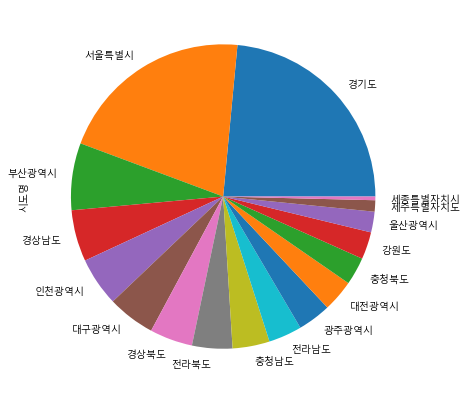

In [83]:
city.plot.pie(figsize=(7,7)) #pie는 오해의 소지가 있고 한눈에 들어오지 않는다는 단점때문에 많이 사용하지 않는다.